In [1]:
# PMT Gain Correction Data Analysis #
# _________________________________ #

# imports
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import math
import os

print(os.getcwd())
#if os.getcwd() == '/Users/sean/Desktop/Research/ELOSS/Scripts/PMT Calibration/':
#    os.chdir('../')
    #print(os.getcwd())
    #os.chdir('../')
#    print(os.getcwd())
#elif os.getcwd() == '/Users/sean/Desktop/Research/ELOSS/Scripts':
#    os.chdir('../')
os.chdir('/Users/sean/Desktop/Work/ELOSS/')
print(os.getcwd())

# read in files as dataframes
#df = pd.read_excel('Data/PMT Gain Correction Data Analysis.xlsx')
full_df = pd.read_excel('Data/UV PMT Calibration - Version 6.xlsx', sheet_name=[0,1],usecols="B:R")
original_df = pd.read_excel('Data/Original PMT Cal Data.xlsm', sheet_name=1,usecols="A:J")

pmts = np.arange(1,121)
led1_short = full_df[0].iloc[::3][:-1]
led2_short = full_df[0].iloc[1::3]
led3_short = full_df[0].iloc[2::3]
led1_long = full_df[1].iloc[::3][:-1]
led2_long = full_df[1].iloc[1::3]
led3_long = full_df[1].iloc[2::3]

led1 = pd.concat([led1_short, led1_long], ignore_index=True)
led2 = pd.concat([led2_short, led2_long], ignore_index=True)
led3 = pd.concat([led3_short, led3_long], ignore_index=True)
led2['PMT#'], led3['PMT#'] = led1['PMT#'], led1['PMT#']
led1 = led1.sort_values(by=['PMT#'])
led2 = led2.sort_values(by=['PMT#'])
led3 = led3.sort_values(by=['PMT#'])

original_df = original_df.sort_values(by=['PMT'])

# Remove elements that are not numbers
clean_led1 = [x for x in list(led1['Calibrated']) if isinstance(x, (int, float)) and math.isnan(x)==False]
clean_led2 = [x for x in list(led2['Calibrated']) if isinstance(x, (int, float)) and math.isnan(x)==False]
clean_led3 = [x for x in list(led3['Calibrated']) if isinstance(x, (int, float)) and math.isnan(x)==False]


/Users/sean/Desktop/Work/ELOSS/Code/PMT Calibration
/Users/sean/Desktop/Work/ELOSS


In [ ]:
corrections1 = np.zeros(len(led1['PMT#']))
for i in range(len(led1['PMT#'])):
    if isinstance(led1['Calibrated 2'][i], (int, float)) and math.isnan(led1['Calibrated 2'][i])==False: 
        corrections1[i] = led1['Calibrated 2'][i]
    elif isinstance(led1['Calibrated'][i], (int, float)) and math.isnan(led1['Calibrated'][i])==False:
        corrections1[i] = led1['Calibrated'][i]
    else:
        corrections1[i] = 0
corrections2 = np.zeros(len(led1['PMT#']))
for i in range(len(led2['PMT#'])):
    if isinstance(led2['Calibrated 2'][i], (int, float)) and math.isnan(led2['Calibrated 2'][i])==False: 
        corrections2[i] = led2['Calibrated 2'][i]
    elif isinstance(led2['Calibrated'][i], (int, float)) and math.isnan(led2['Calibrated'][i])==False:
        corrections2[i] = led2['Calibrated'][i]
    else:
        corrections2[i] = 0
corrections3 = np.zeros(len(led3['PMT#']))
for i in range(len(led3['PMT#'])):
    if isinstance(led3['Calibrated 2'][i], (int, float)) and math.isnan(led3['Calibrated 2'][i])==False: 
        corrections3[i] = led3['Calibrated 2'][i]
    elif isinstance(led3['Calibrated'][i], (int, float)) and math.isnan(led3['Calibrated'][i])==False:
        corrections3[i] = led3['Calibrated'][i]
    else:
        corrections3[i] = 0

In [ ]:
pe_led1 = (np.array(led1['800 V']) - np.mean(np.array(led1['800 V'])))/np.mean(np.array(led1['800 V']))
pe_led2 = (np.array(led2['800 V']) - np.mean(np.array(led2['800 V'])))/np.mean(np.array(led2['800 V']))
pec_led1 = (clean_led1 - np.mean(clean_led1))/np.mean(clean_led1)
pec_led2 = (clean_led2 - np.mean(clean_led2))/np.mean(clean_led2)
pec2_led1 = (corrections1 - np.mean(corrections1))/np.mean(corrections1)
pec2_led2 = (corrections2 - np.mean(corrections2))/np.mean(corrections2)
# Replace entries containing "saturates" with 66000
for i in range(len(led3['800 V'])):
    if led3['800 V'].iloc[i] == 'saturates' or led3['800 V'].iloc[i] == 'Saturates':
        led3['800 V'].iloc[i] = 66000

pe_led3 = (np.array(led3['800 V']) - np.mean(np.array(led3['800 V'])))/np.mean(np.array(led3['800 V']))
pec_led3 = (clean_led3 - np.mean(clean_led3))/np.mean(clean_led3)
pec2_led3 = (corrections3 - np.mean(corrections3))/np.mean(corrections3)
norm_orig = (np.array(original_df['Gain @ 800 V'])/np.mean(np.array(original_df['Gain @ 800 V']))) - 1
 
stdv1 = 0.01*2100
stdv2 = 0.01*14000
stdv3 = 0.01*45000

pmt_range = range(len(led1['PMT#']))

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,5))
ax1.bar(pmt_range,pe_led1*100, color='orange')
ax1.bar(pmt_range,pe_led2*100, color='blue')
ax1.bar(pmt_range,pe_led3*100, color='green')
ax1.set_xlabel("PMT #")
ax1.set_ylabel("Percent Difference from the Mean")
ax1.set_title("Before Gain Correction w/ Voltage")
ax2.bar(range(len(pec_led1)),pec_led1*100, color='orange', label="LED1")
ax2.bar(range(len(pec_led2)),pec_led2*100, color='blue', label="LED2")
ax2.bar(range(len(pec_led2)),pec_led3*100, color='green', label="LED3")
ax2.set_xlabel("PMT #")
ax2.set_title("After Gain Correction w/ Fit Voltage")
ax2.legend(loc="lower center")
ax3.bar(pmt_range,pec2_led1*100, color='orange')
ax3.bar(pmt_range,pec2_led2*100, color='blue')
ax3.bar(pmt_range,pec2_led3*100, color='green')
ax3.set_xlabel("PMT #")
#ax3.set_ylabel("Percent Difference from the Mean")
ax3.set_title("Final Gain Correction w/ Voltage")
print("Standard deviation of 800 V measurement (1, 2, 3): ",
      round(np.std(led1['800 V']),2), round(np.std(led2['800 V']),2), round(np.std(led3['800 V'])),2)
print("Standard deviation of 800 V measurement / Desired standard deviation (1, 2, 3): ",
      round(np.std(led1['800 V'])/stdv1,2), round(np.std(led2['800 V'])/stdv2,2), round(np.std(led3['800 V'])/stdv3,2))

In [ ]:
print("Standard deviation @ calibrated voltage (1, 2, 3): ",
      np.std(clean_led1), np.std(clean_led2), np.std(clean_led3))
print("Standard deviation (%) @ calibrated voltage (1, 2, 3): ",
      np.std(clean_led1)/np.mean(clean_led1), np.std(clean_led2)/np.mean(clean_led2), np.std(clean_led3)/np.mean(clean_led3))
print("Standard deviation @ calibrated voltage / target standard deviation (1, 2, 3): ",
      round(np.std(clean_led1)/stdv1,2), round(np.std(clean_led2)/stdv2,2), round(np.std(clean_led3)/stdv3,2))

print("Standard deviation (%) @ final calibrated voltage (1, 2, 3): ",
      np.std(corrections1)/np.mean(corrections1), np.std(corrections2)/np.mean(corrections2), 
      np.std(corrections3)/np.mean(corrections3))


In [ ]:
c1 = corrections1[corrections1 != 0]
c2 = corrections2[corrections2 != 0]
c3 = corrections3[corrections3 != 0]

print("Standard deviation (%) @ final calibrated voltage (1, 2, 3): ",
      np.std(c1)/np.mean(c1), np.std(c2)/np.mean(c2), 
      np.std(c3)/np.mean(c3))


In [ ]:
diff1 = np.array(clean_led1) - 2100
print(len(diff1[diff1<0])/len(diff1))
diff2 = np.array(clean_led2) - 14000
print(len(diff2[diff2<0])/len(diff2))
diff3 = np.array(clean_led3) - 45000
print(len(diff3[diff3<0])/len(diff3))

In [ ]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,7))
ax1.hist(clean_led1, bins=40, color='lightskyblue')
ax1.plot([2100,2100],[0,12],c='red', linestyle='dashed')
ax1.set_xticks(np.arange(min(clean_led1),max(clean_led1)+1,(max(clean_led1)+1-min(clean_led1))/5))
ax1.set_xlim(min(clean_led1)-(max(clean_led1)+1-min(clean_led1))/5,max(clean_led1))
ax1.set_ylim(0,12)
ax2.hist(clean_led2,bins=40)
ax2.set_xticks(np.arange(min(clean_led2),max(clean_led2)+1,(max(clean_led2)+1-min(clean_led2))/5))
ax3.hist(clean_led3,bins=40)
ax3.set_xticks(np.arange(min(clean_led3),max(clean_led3)+1,(max(clean_led3)+1-min(clean_led3))/5))

In [ ]:
#original_df['Gain @ 800 V']
# Remove elements that are not numbers
clean_led1o = [x for x in list(led1['Calibrated']) if isinstance(x, (int, float)) and math.isnan(x)==False]
clean_led2o = [x for x in list(led2['Calibrated']) if isinstance(x, (int, float)) and math.isnan(x)==False]
clean_led3o = [x for x in list(led3['Calibrated']) if isinstance(x, (int, float)) and math.isnan(x)==False]


In [ ]:
#np.std(clean_led1o)/np.mean(clean_led1o), np.std(clean_led2o)/np.mean(clean_led2o), np.std(clean_led3o)/np.mean(clean_led3o)
#np.std(clean_led1o), np.std(clean_led2o), np.std(clean_led3o)
#np.mean(clean_led1o), np.mean(clean_led2o), np.mean(clean_led3o)

X = np.ma.masked_equal(corrections1,0)
Y = np.ma.masked_equal(corrections2,0)
Z = np.ma.masked_equal(corrections3,0)
#print(clean_led1ox)
np.std(X)/np.mean(X), np.std(Y)/np.mean(Y), np.std(Z)/np.mean(Z)
#np.std(X), np.std(Y), np.std(Z)
#np.mean(X), np.mean(Y), np.mean(Z)

### Compare the variations in sensitivities given from the old calibration to the new - before voltage gain correction. ###


In [ ]:
led3['Drift Test @ 800 V']
drift1 = [x for x in list(led1['Drift Test @ 800 V']) if isinstance(x, (int, float)) and math.isnan(x)==False]
drift2 = [x for x in list(led2['Drift Test @ 800 V']) if isinstance(x, (int, float)) and math.isnan(x)==False]
drift3 = [x for x in list(led3['Drift Test @ 800 V']) if isinstance(x, (int, float)) and math.isnan(x)==False]

In [3]:
led3_c = led3
rows=[]
for i in range(len(led3)):
    if isinstance(led3.loc[i,'800 V'],str) or math.isnan(led3.loc[i,'Drift Test @ 800 V']):
        print("Drop row", i)
        rows.append(i)
led3_d = led3_c.drop(rows)

Drop row 1
Drop row 10
Drop row 11
Drop row 23
Drop row 25
Drop row 29
Drop row 43
Drop row 46
Drop row 56
Drop row 60
Drop row 85
Drop row 91


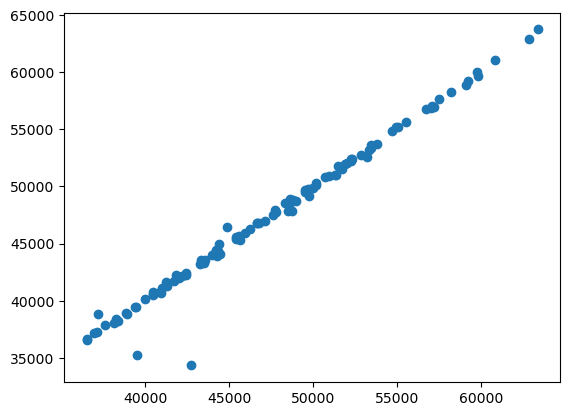

In [5]:
plt.scatter(led3_d['800 V'], led3_d['Drift Test @ 800 V'])

In [7]:
led3_s = led3_d.loc[:,['800 V','Drift Test @ 800 V']]
led3_s.to_csv("DriftTestData.csv")

In [ ]:
plt.figure(1)
plt.hist(drift1,bins=5,label='Repeat', color='orange')
plt.hist(corrections1,bins=5,label='Original',color='green')
#plt.figure(2)
plt.hist(drift2,bins=20,color='orange')
plt.hist(corrections2,bins=20,color='green')
#plt.figure(3)
plt.hist(drift3,bins=40,color='orange')
plt.hist(corrections3,bins=40,color='green')
plt.xlabel("QDC Channel", fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.title("Original Calibration vs. Repeated Measurement",fontsize=15)
plt.legend()

In [ ]:
np.mean(drift1)-np.mean(corrections1),np.mean(drift2)-np.mean(corrections2),np.mean(drift3)-np.mean(corrections3)
#np.std(drift1),np.std(drift2),np.std(drift3)
#np.std(drift1)/np.mean(drift1),np.std(drift2)/np.mean(drift2),np.std(drift3)/np.mean(drift3)

In [ ]:
#print(np.mean(drift1),np.mean(drift2),np.mean(drift3))
led1

In [ ]:
pdif = []
for i in range(len(led1['Drift Test @ 800 V'])):
    if isinstance(led1.iloc[i,10], (int, float)) and math.isnan(led1.iloc[i,10])==False:
        #print(abs(led1.iloc[i,10] - led1.iloc[i,7])/led1.iloc[i,7]*100)
        pdif.append(abs(led1.iloc[i,10] - led1.iloc[i,7])/led1.iloc[i,7]*100)
        
#plt.hist(pdif)
pdif = np.array(pdif)
len(pdif[pdif<1.5])/120

In [ ]:
pdif = []
for i in range(len(led2['Drift Test @ 800 V'])):
    if isinstance(led2.iloc[i,10], (int, float)) and math.isnan(led2.iloc[i,10])==False:
        #print(abs(led2.iloc[i,10] - led2.iloc[i,7])/led2.iloc[i,7]*100)
        pdif.append(abs(led2.iloc[i,10] - led2.iloc[i,7])/led2.iloc[i,7]*100)
pdif = np.array(pdif)      
len(pdif[pdif<1.5])/120

In [ ]:
pdif = []
for i in range(len(led3['Drift Test @ 800 V'])):
    if isinstance(led3.iloc[i,10], (int, float)) and math.isnan(led3.iloc[i,10])==False:
        #print(abs(led3.iloc[i,10] - led3.iloc[i,7])/led3.iloc[i,7]*100)
        pdif.append(abs(led3.iloc[i,10] - led3.iloc[i,7])/led3.iloc[i,7]*100)
        
pdif = np.array(pdif)      
len(pdif[pdif<1.5])/120